# Decision Tree Classifier
# KNN Classifier (Scikit-learn)

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Load IRIS dataset

IRIS dataset as df to for better illustration ????

In [2]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### To have better understanding of the dataset, let's print it in tabular form.

**Note:** Ignore the code in the cell below; we will revisit it later when we introduce pandas.


In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### As you can see the dataset is in the form of a `dictionay`. What are the `keys` of the dictionary?


In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])



#### What is the value of the key `data`? Assign the value to a variable `X`


In [5]:
X = iris['data']
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.


#### What is the `shape` of `X`?


In [6]:
print(X.shape)

(150, 4)



#### What is the value of the key `target`? Assign the value to a variable `y`


In [7]:
y = iris['target']
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



#### What is the `shape` of `y`?


In [8]:
print(y.shape)

(150,)



#### What is the value of the key `target_names`? Assign the value to a variable `target_names`


In [9]:
target_names = iris['target_names']
print(target_names)

['setosa' 'versicolor' 'virginica']



#### What is the value of the key `feature_names`? Assign the value to a variable `feature_names`


In [10]:
feature_names = iris['feature_names']
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Print the 5th datapoint in your dataset `X`


In [11]:
print(X[4])

[5.  3.6 1.4 0.2]



#### Print the features and target label of flower 1 to 5.


In [12]:
for i in range(5):
    print(f"Flower {i+1}:")
    print(f"  Features (Sepal Length, Sepal Width, Petal Length, Petal Width): {X[i]}")
    print(f"  Target Label: {y[i]}")
    print()

Flower 1:
  Features (Sepal Length, Sepal Width, Petal Length, Petal Width): [5.1 3.5 1.4 0.2]
  Target Label: 0

Flower 2:
  Features (Sepal Length, Sepal Width, Petal Length, Petal Width): [4.9 3.  1.4 0.2]
  Target Label: 0

Flower 3:
  Features (Sepal Length, Sepal Width, Petal Length, Petal Width): [4.7 3.2 1.3 0.2]
  Target Label: 0

Flower 4:
  Features (Sepal Length, Sepal Width, Petal Length, Petal Width): [4.6 3.1 1.5 0.2]
  Target Label: 0

Flower 5:
  Features (Sepal Length, Sepal Width, Petal Length, Petal Width): [5.  3.6 1.4 0.2]
  Target Label: 0



#### Find the `max`, `min` and `mean` value of each feature in the dataset `X`

Helper: you can iterate through the columns of the dataset and use the `np.max()`, `np.min()` and `np.mean()` functions to find the required values. or the better way is to use `axis` parameter of the `np.max()`, `np.min()` and `np.mean()` functions.

In [13]:
max_values = np.max(X, axis=0)
print("Maximum values for each feature:")
print(f"  Sepal Length: {max_values[0]}")
print(f"  Sepal Width: {max_values[1]}")
print(f"  Petal Length: {max_values[2]}")
print(f"  Petal Width: {max_values[3]}")

min_values = np.min(X, axis=0)
print("\nMinimum values for each feature:")
print(f"  Sepal Length: {min_values[0]}")
print(f"  Sepal Width: {min_values[1]}")
print(f"  Petal Length: {min_values[2]}")
print(f"  Petal Width: {min_values[3]}")

mean_values = np.mean(X, axis=0)
print("\nMean values for each feature:")
print(f"  Sepal Length: {mean_values[0]:.2f}")
print(f"  Sepal Width: {mean_values[1]:.2f}")
print(f"  Petal Length: {mean_values[2]:.2f}")
print(f"  Petal Width: {mean_values[3]:.2f}")


Maximum values for each feature:
  Sepal Length: 7.9
  Sepal Width: 4.4
  Petal Length: 6.9
  Petal Width: 2.5

Minimum values for each feature:
  Sepal Length: 4.3
  Sepal Width: 2.0
  Petal Length: 1.0
  Petal Width: 0.1

Mean values for each feature:
  Sepal Length: 5.84
  Sepal Width: 3.06
  Petal Length: 3.76
  Petal Width: 1.20



#### Iterate over all datapoints in `X` and calculate the `area` of Sepal and Petal for each flower in the dataset.

`Sepal area` = `Sepal length` * `Sepal width`

`Petal area` = `Petal length` * `Petal width`


In [14]:
sepal_areas = []
petal_areas = []

for i in range(len(X)):
    sepal_length = X[i][0]
    sepal_width = X[i][1]
    petal_length = X[i][2]
    petal_width = X[i][3]

    sepal_area = sepal_length * sepal_width
    petal_area = petal_length * petal_width
    sepal_areas.append(sepal_area)
    petal_areas.append(petal_area)

for i in range(len(sepal_areas)):
    print(f"Flower {i + 1}:")
    print(f"  Sepal Area = {sepal_areas[i]:.2f}")
    print(f"  Petal Area = {petal_areas[i]:.2f}\n")


Flower 1:
  Sepal Area = 17.85
  Petal Area = 0.28

Flower 2:
  Sepal Area = 14.70
  Petal Area = 0.28

Flower 3:
  Sepal Area = 15.04
  Petal Area = 0.26

Flower 4:
  Sepal Area = 14.26
  Petal Area = 0.30

Flower 5:
  Sepal Area = 18.00
  Petal Area = 0.28

Flower 6:
  Sepal Area = 21.06
  Petal Area = 0.68

Flower 7:
  Sepal Area = 15.64
  Petal Area = 0.42

Flower 8:
  Sepal Area = 17.00
  Petal Area = 0.30

Flower 9:
  Sepal Area = 12.76
  Petal Area = 0.28

Flower 10:
  Sepal Area = 15.19
  Petal Area = 0.15

Flower 11:
  Sepal Area = 19.98
  Petal Area = 0.30

Flower 12:
  Sepal Area = 16.32
  Petal Area = 0.32

Flower 13:
  Sepal Area = 14.40
  Petal Area = 0.14

Flower 14:
  Sepal Area = 12.90
  Petal Area = 0.11

Flower 15:
  Sepal Area = 23.20
  Petal Area = 0.24

Flower 16:
  Sepal Area = 25.08
  Petal Area = 0.60

Flower 17:
  Sepal Area = 21.06
  Petal Area = 0.52

Flower 18:
  Sepal Area = 17.85
  Petal Area = 0.42

Flower 19:
  Sepal Area = 21.66
  Petal Area = 0.51

Fl

## Decision Tree

### 0 - Data prepraration

#### Split the dataset into training and testing set using `train_test_split` function. Use `random_state=42` and `test_size=0.33`

Helper: Use `train_test_split` function from `sklearn.model_selection` and pass `X`, `y` and the parameters `random_state=42` and `test_size=0.33` to the function.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 100
Testing set size: 50


#### What is the `shape` of `X_train`, `X_test`, `y_train` and `y_test`?

In [17]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (100, 4)
X_test: (50, 4)
y_train: (100,)
y_test: (50,)


#### Locate `X_train`, `X_test`, `y_train` and `y_test` in the the folwoing flow chart.

Your Answer:

<img src="./Scikit-learn-flow.jpeg" width="500" hight="400" />

### 1 - Train the model on the training data

#### Create a decision tree classifier

Helper: Make an object form `DecisionTreeClassifier` class from `sklearn.tree` package - Use default constructor to initialize the object

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


#### Train the model on the training data

Helper: Use `fit` method of the object created in the previous step. Pass `X_train` and `y_train` as arguments to the `fit` method.

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Visualize the decision tree model

**Note:** `model`  in the code below is the name of classifier object. You may change it if you have used a different name.

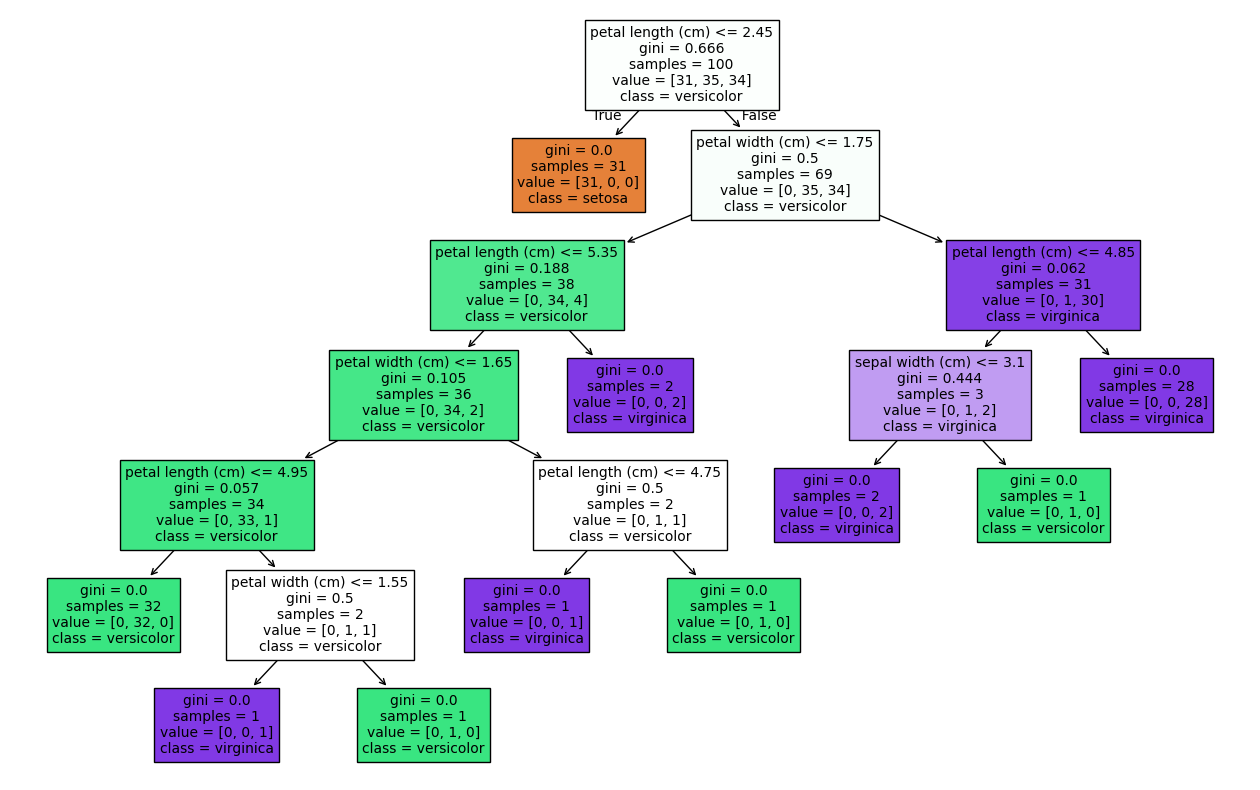

In [20]:
#Solution
plt.figure(figsize=(16,10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, fontsize=10)
plt.show()

### 2 - Test the model: Make predictions on the test data

#### Manually predict the label of one datapoint form test set. Take one datapoit from test set and use the decision tree shown above to predict its lable.

In [21]:
print("sample data point", X_test[0])
print("sample data point label", y_test[0])

sample data point [6.1 2.8 4.7 1.2]
sample data point label 1


#### Write your manual prediction here:

Your Answer:
Label will be 1 and it belongs to Iris Versicolor

#### Predict the labels of the test set

Helper: Use `predict` method of the classifier object created in the previous step. Pass `X_test` as an argument to the `predict` method.

In [22]:
y_pred = model.predict(X_test)
print("Prediction for the test set:", y_pred)

Prediction for the test set: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


#### Print `y_pred` and `y_test`

In [23]:
print("Predicted (y_pred):", y_pred)
print("Actual (y_test):", y_test)

Predicted (y_pred): [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Actual (y_test): [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


### 3 - Evaluate the model

#### What percentage of elements in `y_pred` match the corresponding elements in `y_test`?

Helper: Use `accuracy_score` function from `sklearn.metrics` package and pass `y_test` and `y_pred` as arguments to the function.


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


## K Nearest Neighbors (KNN) with Scikit-learn

### Repeat the steps of `create the classifier object`, fit (model), predict (labels), and evaluating for the KNN classifier.

Helper: Use `KNeighborsClassifier` class from `sklearn.neighbors` package to create the classifier object. Instantiate it with the `KNeighborsClassifier(n_neighbors=4)` constructor.

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

In [26]:
print("Prediction of KNN (knn_y_pred):", knn_y_pred)
print("Actual (y_test):", y_test)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

Prediction of KNN (knn_y_pred): [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Actual (y_test): [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
KNN Accuracy: 98.00%


#### Find the optimal value of `n_neighbors` for KNN classifier.

Helper: Calculate the accuracy of the model for different values of `k` and plot the accuracy vs `k` graph. You may choose the range of `k` from 1 to 10.


In [27]:
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
accs = []

for k in K:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accs.append(accuracy)

    print(f"k Accuracy = {k}: {accuracy * 100:.2f}%")

k Accuracy = 1: 98.00%
k Accuracy = 2: 98.00%
k Accuracy = 3: 98.00%
k Accuracy = 4: 98.00%
k Accuracy = 5: 98.00%
k Accuracy = 6: 98.00%
k Accuracy = 7: 98.00%
k Accuracy = 8: 98.00%
k Accuracy = 9: 98.00%
k Accuracy = 10: 98.00%
k Accuracy = 11: 100.00%
k Accuracy = 12: 100.00%
k Accuracy = 13: 100.00%
k Accuracy = 14: 100.00%
k Accuracy = 15: 100.00%


#### Report the optimal value of `k` for the KNN classifier and the corresponding accuracy.

Your Answer:
5

#### (Optional) Finding the optimal value of `k` using `GridSearchCV`
We split the dataset to test and train using `train_test_split` function. Howevern we can also use `cross-validation` to split the dataset `X` and `y`.

For example, if we use `cv=5`, the dataset will be split into 5 parts. 4 parts will be used for training and 1 part will be used for testing. This process will be repeated 5 times on multiple splits and the average accuracy will be calculated.

<img src="./cross_validation.jpg" width="800" hight="200" />

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [31]:
K = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15]
grid = GridSearchCV(knn_model, param_grid={'n_neighbors': K}, cv=5)

GridSearchCV object is like the scikit learn model and we can use the `fit` methodover it. Here, we pass the `X` and `y` to the `fit` method.

In [32]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

We can see the result of the grid search using the `cv_results_` attribute of the `GridSearchCV` object. The `cv_results_` attribute is a dictionary where each key is a string and each value is a list of values. We turned this into a pandas `DataFrame` to make it easier to read.

In [33]:
grid.cv_results_
result = pd.DataFrame(grid.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003389,0.004054,0.014951,0.003617,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,14
1,0.001536,0.000314,0.015737,0.011863,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,15
2,0.001408,0.000127,0.007403,0.002522,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.001439,0.000125,0.007158,0.001614,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.001324,0.000056,0.005697,0.000332,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6
5,0.001363,0.000172,0.006165,0.001427,6,{'n_neighbors': 6},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
6,0.001421,0.000361,0.012493,0.009082,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
7,0.001888,0.000716,0.007497,0.001383,8,{'n_neighbors': 8},0.966667,1.000000,0.933333,0.933333,1.0,0.966667,0.029814,10
8,0.001589,0.000189,0.014553,0.005737,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.933333,1.0,0.973333,0.024944,6
9,0.001348,0.000109,0.006634,0.000602,10,{'n_neighbors': 10},0.966667,1.000000,1.000000,0.933333,1.0,0.980000,0.026667,1


Plotting the accuracy vs `k` graph using `GridSearchCV`.

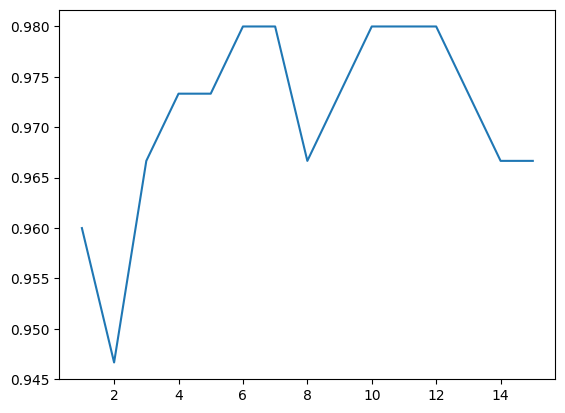

In [34]:
plt.plot(K, result['mean_test_score'], label = "GridSearchCV results")

#### (Optional) What is `split0_test_score`, `split1_test_score`, `split2_test_score`, and	`mean_test_score` in the table above?

Your Answer:
These are the test scores for cross-validations.

#### (Optional) Report the optimal value of `k` for the KNN classifier using `GridSearchCV`?

Your Answer:
Optimal value of k will be 6 with accuracy of 98%

#### (Optional) Fiind the mean test score for Decision Tree Classifier using `cross-validation` with `cv=3`.

In [37]:
from sklearn.model_selection import cross_val_score
decision_tree_model = DecisionTreeClassifier()
scores = cross_val_score(decision_tree_model, X, y, cv=3)
mean_score = scores.mean()
print(f"Cross-validation: {scores}")
print(f"Mean Test Score (cv=3): {mean_score:.2f}")

Cross-validation: [0.98 0.92 1.  ]
Mean Test Score (cv=3): 0.97


## KNN and Decision Tree Classifiers Comparison

#### Report the higher accuracy of the two classifiers. Which one was better?

Your Answer:
KNN performs better than the Decision Tree Classifiers becuase it leveraged the structure of the dataset well, resulting in more consistent and accurate predictions.